In [10]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'pi', 'sin']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [7]:
# Import required modules
import numpy as np
from math import sin,pi
from scipy import signal
from numpy import arange
from numpy.fft import rfft
import matplotlib.pyplot as plt

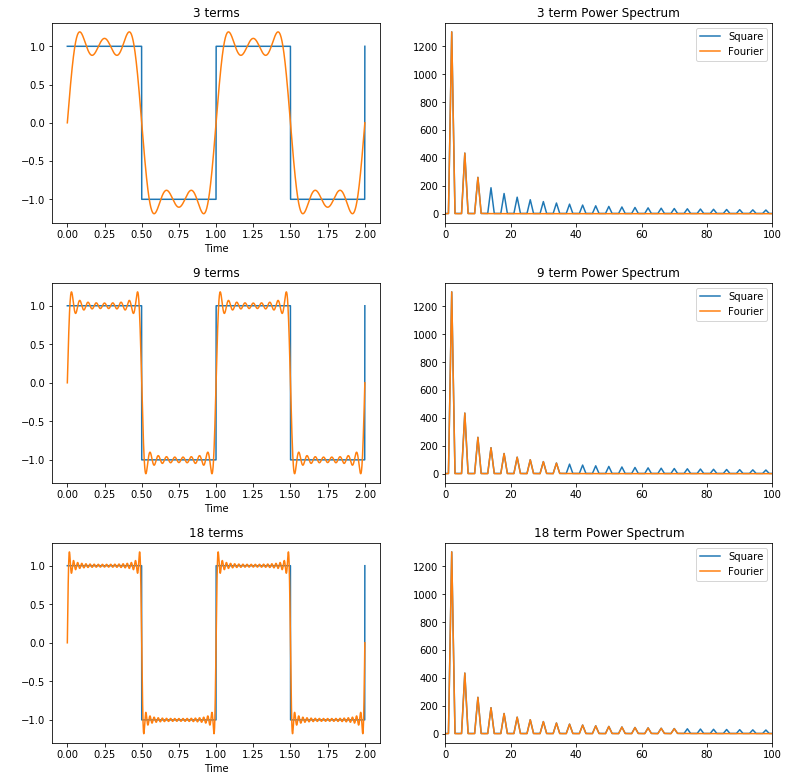


From the plots in the left column we clearly see that as the terms increase, the quality of the fourier function fit also
increases. From a theoretical point of view this result makes sense since the infinite sum converges to the square wave f(t).

In the right column we see a comparison of the functions power spectra for each k. We observe that in each plot, after k
peaks (Fourier coefficients) the value of the rest of the amplitudes becomes zero since the expansion did not include those
frequencies. The original function, of course, continues to show these amplitudes of magnitude 4/[π(2k - 1)] and this also 
demonstrates how an infinite sum is needed for convergence on the original square wave function.


In [9]:
# Define square wave function
def f(t):
    y = signal.square(2*pi*t)
    return y

t = np.linspace(0., 2., 2048) # plotting interval (x vector)
y = list(map(f, t))           # square wave function (y vector)

# Define its Fourier expansion function
def Fourier(t, k, v = 1.0):
    s = 0 
    for i in range(1, k + 1):
        s += 1/(2*i-1)*sin(2*pi*(2*i-1)*v*t)
    y = 4/pi * s
    return y

# Define vector function for Fourier() truncated at k (PS: for automation)
def F(t, k, v = 1.0):
    y = np.zeros(len(t))
    for i in range(len(t)):
        y[i] = Fourier(t[i], k)
    return y


#Make plots pretty 
f, axs = plt.subplots(3,2,figsize=(10,10))
plt.subplots_adjust(left=1, bottom=1, right=2, top=2, wspace=0.2, hspace=0.3)

# Plot square wave and Fourier expansion truncated at 3
plt.subplot(321)
plt.plot(t, y, label = 'Square Wave')
plt.plot(t, F(t, 3), label = 'Fourier expansion')
plt.xlabel('Time')
plt.ylabel(' ')
plt.title('3 terms')

# Plot square wave and Fourier expansion truncated at 9
plt.subplot(323)
plt.plot(t, y, label = 'Square Wave')
plt.plot(t, F(t, 9), label = 'Fourier expansion')
plt.xlabel('Time')
plt.ylabel(' ')
plt.title('9 terms')

# Plot square wave and Fourier expansion truncated at 18
plt.subplot(325)
plt.plot(t, y, label = 'Square Wave')
plt.plot(t, F(t, 18), label = 'Fourier expansion')
plt.xlabel('Time')
plt.ylabel(' ')
plt.title('18 terms')




#3 term Plot for comparison of power spectra
plt.subplot(322)
b = rfft(y)                    # Calculate the Fourier coefficients for the square wave function f() 
c = rfft(F(t,3))               # Calculate the Fourier coefficients for the Fourier function
plt.plot(abs(b), label = 'Square') # Plot their magnitudes vs mode number
plt.plot(abs(c), label = 'Fourier')# Plot their magnitudes vs mode number 
plt.xlim(0,100)                    # Show the first 100 modes
plt.title('3 term Power Spectrum')
plt.legend()

#9 term Plot for comparison of power spectra
plt.subplot(324)
b = rfft(y)                    
c = rfft(F(t,9))
plt.plot(abs(b), label = 'Square') 
plt.plot(abs(c), label = 'Fourier')     
plt.title('9 term Power Spectrum')
plt.xlim(0,100)                    
plt.legend()

#18 term Plot for comparison of power spectra
plt.subplot(326)
b = rfft(y)
c = rfft(F(t,18))   
plt.plot(abs(b), label = 'Square')
plt.plot(abs(c), label = 'Fourier')             
plt.title('18 term Power Spectrum')
plt.xlim(0,100)                    
plt.legend()
plt.show()

print('\r')
print('From the plots in the left column we clearly see that as the terms increase, the quality of the fourier function fit also')
print('increases. From a theoretical point of view this result makes sense since the infinite sum converges to the square wave f(t).')
print('\r')
print('In the right column we see a comparison of the functions power spectra for each k. We observe that in each plot, after k')
print('peaks (Fourier coefficients) the value of the rest of the amplitudes becomes zero since the expansion did not include those')
print('frequencies. The original function, of course, continues to show these amplitudes of magnitude 4/[π(2k - 1)] and this also ')
print('demonstrates how an infinite sum is needed for convergence on the original square wave function.')
